<a href="https://colab.research.google.com/github/Mukul1Panwar/Deep-Learning/blob/main/Fashion_rec(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NOTE
'''FAISS → returns index numbers
↓
image_files.pkl → converts index → relative path
↓
DATASET_ROOT → converts relative path → real file'''

'''FAISS index
   ↓ (39606)
image_files.pkl
   ↓ ("images/39606.jpg")
DATASET_ROOT
   ↓ (/content/.../images/39606.jpg)
image.load_img()
'''

'FAISS index\n   ↓ (39606)\nimage_files.pkl\n   ↓ ("images/39606.jpg")\nDATASET_ROOT\n   ↓ (/content/.../images/39606.jpg)\nimage.load_img()\n'

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!unzip fashion-product-images-small.zip

In [ ]:
DATASET_ROOT = "/content/drive/MyDrive/fashion/myntradataset" # DATASET_ROOT is a folder path on disk where your images are stored.

In [ ]:
import os
import pickle
from tensorflow.keras.preprocessing import image

In [ ]:
with open ("/content/images_files.pkl","rb") as f:
  image_file = pickle.load(f)

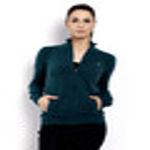

In [ ]:
img1 = os.path.join(DATASET_ROOT,image_file[1111])
img1 = image.load_img(img1,target_size=(150,150),interpolation='bicubic')
img1

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [ ]:
base_model = ResNet50(include_top=False,weights='imagenet',pooling='avg')
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 88.2 MB/s eta 0:00:00


In [ ]:
import faiss

In [ ]:
index = faiss.read_index("/content/fashion.index")
index.ntotal

44441

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize

In [ ]:
def upload_image(input_img,model):
  img = image.load_img(input_img,target_size=(400,400),interpolation='bicubic')
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)

  emb = model.predict(img)
  emb = normalize(emb)

  return emb

In [ ]:
upload_image("/content/belt.webp",base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.00128088, 0.0406597 , 0.00647097, ..., 0.00034328, 0.05728656,
        0.00276627]], dtype=float32)

In [1]:
def rec(input_img,index,top_k=5):
  D, I = index.search(input_img,top_k)  # D: Contains the distances (or similarity scores) of the retrieved neighbors.
    # I: Contains the actual indices (IDs) of the retrieved neighbors within your original dataset.
  return D[0][1:], I[0][1:]

In [ ]:
img_embedding = upload_image("/content/shoes.jpg", base_model)
similar_index = rec(img_embedding, index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
similar_index

array([39606, 21910,  3840, 32303])

In [ ]:
rec_items = [image_file[i] for i in similar_index]
rec_items

['images/58296.jpg',
 'images/36139.jpg',
 'images/14615.jpg',
 'images/49268.jpg']

In [ ]:
from IPython.display import display
for item in rec_items:
  full_path = os.path.join(DATASET_ROOT, item)
  img = image.load_img(full_path, target_size=(300,300), interpolation='bicubic')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

upload an image : /content/mike hussy.webp


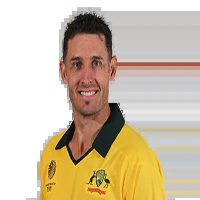

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Similar Images


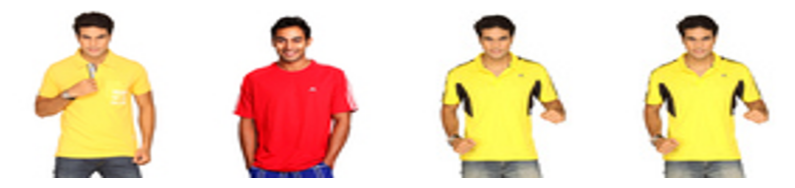

In [ ]:
from tensorflow.keras.preprocessing import image # Re-import image module
import os

photo = input("upload an image : ")
img2 = cv2.imread(photo)
img3 = cv2.resize(img2, (200,200))
cv2_imshow(img3)

uploaded_image = upload_image(photo,base_model)
indices = rec(uploaded_image,index,top_k=5)

similar_index = [image_file[i] for i in indices]

print("Similar Images")

plt.figure(figsize=(10,15))
for idx, item_path in enumerate(similar_index):
  full_path = os.path.join(DATASET_ROOT,item_path)
  img = image.load_img(full_path,target_size=(400,400),interpolation='bicubic')

  plt.subplot(1,len(similar_index),idx+1)
  plt.imshow(img)
  plt.axis('off')

plt.show()